# Project_1: Custumer Clustering with RFM & Clustering Algorithm


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

In [ ]:
path1='/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Du_lieu_cung_cap/Products_with_Categories.csv'
path2= '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Du_lieu_cung_cap/Transactions.csv'

In [ ]:
products = pd.read_csv(path1)
transactions = pd.read_csv(path2)

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [ ]:
products.Category.unique()

array(['Fresh Food', 'Dairy', 'Bakery & Sweets', 'Household & Hygiene',
       'Beverages', 'Frozen & Processed Food', 'Pantry Staples',
       'Specialty & Seasonal', 'Pet Care', 'Personal Care', 'Snacks'],
      dtype=object)

In [ ]:
products.head()

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [ ]:
products.isnull().sum()

,0
productId,0
productName,0
price,0
Category,0


In [ ]:
products.duplicated().sum()

np.int64(0)

* data khong missing and khong duplicated values

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


* Chuyen doi kieu du lieu cua 'Date' tu object qua datatime

In [ ]:
transactions.head()

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


In [ ]:
transactions.isnull().sum()

,0
Member_number,0
Date,0
productId,0
items,0


In [ ]:
transactions.duplicated().sum()

np.int64(244)

In [ ]:
transactions.Member_number.nunique()

3898

In [ ]:
# gộp 2 bảng transactions, products thành data
data = transactions.merge(products, on='productId', how = 'left')

In [ ]:
# tạo cột mới 'Goss_sale'
data['Gross_sales'] = data['items'] * data['price']

In [ ]:
data.head()

,Member_number,Date,productId,items,productName,price,Category,Gross_sales
0,1808,21-07-2015,1,3,tropical fruit,7.8,Fresh Food,23.4
1,2552,05-01-2015,2,1,whole milk,1.8,Dairy,1.8
2,2300,19-09-2015,3,3,pip fruit,3.0,Fresh Food,9.0
3,1187,12-12-2015,4,3,other vegetables,0.8,Fresh Food,2.4
4,3037,01-02-2015,2,1,whole milk,1.8,Dairy,1.8


In [ ]:
data.tail()

,Member_number,Date,productId,items,productName,price,Category,Gross_sales
38760,4471,08-10-2014,76,2,sliced cheese,4.2,Dairy,8.4
38761,2022,23-02-2014,65,3,candy,3.6,Bakery & Sweets,10.8
38762,1097,16-04-2014,154,2,cake bar,2.4,Bakery & Sweets,4.8
38763,1510,03-12-2014,12,3,fruit/vegetable juice,2.1,Beverages,6.3
38764,1521,26-12-2014,104,3,cat food,11.2,Pet Care,33.6


In [ ]:
data.isnull().sum()

,0
Member_number,0
Date,0
productId,0
items,0
productName,0
price,0
Category,0
Gross_sales,0


In [ ]:
# chuyển đổi kiểu dữ liệu cho cột 'Date'
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

In [ ]:
#Tạo cột 'orderID': Nếu khách hàng mua nhiều sản phẩm trong cùng một ngày → coi như 1 đơn hàng (chung OrderID)
data['OrderID'] = data.groupby(by=['Member_number', 'Date']).ngroup()+1

In [ ]:
data.to_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data.csv', index=False)

In [ ]:
data.head()

,Member_number,Date,productId,items,productName,price,Category,Gross_sales,OrderID,YearMonth
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,2988,2015-07
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,5784,2015-01
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,4852,2015-09
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4,688,2015-12
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8,7585,2015-02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Member_number  38765 non-null  int64         
 1   Date           38765 non-null  datetime64[ns]
 2   productId      38765 non-null  int64         
 3   items          38765 non-null  int64         
 4   productName    38765 non-null  object        
 5   price          38765 non-null  float64       
 6   Category       38765 non-null  object        
 7   Gross_sales    38765 non-null  float64       
 8   OrderID        38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.7+ MB


In [ ]:
data.describe()

,Member_number,Date,productId,items,price,Gross_sales,OrderID
count,38765.000000,38765,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2015-01-09 18:17:12.498387712,39.956094,1.996131,4.295170,8.568545,7470.155217
min,1000.000000,2014-01-01 00:00:00,1.000000,1.000000,0.300000,0.300000,1.000000
25%,2002.000000,2014-07-12 00:00:00,9.000000,1.000000,1.250000,2.400000,3733.000000
50%,3005.000000,2015-01-21 00:00:00,25.000000,2.000000,2.500000,5.200000,7466.000000
75%,4007.000000,2015-07-10 00:00:00,64.000000,3.000000,6.100000,10.500000,11195.000000
max,5000.000000,2015-12-30 00:00:00,167.000000,3.000000,28.500000,85.500000,14963.000000
std,1153.611031,NaN,37.294166,0.817645,4.313656,9.937551,4322.026670


* items va price > 0
* mean, std cua price, Gross_sales, items khong chenh lech qua nhieu

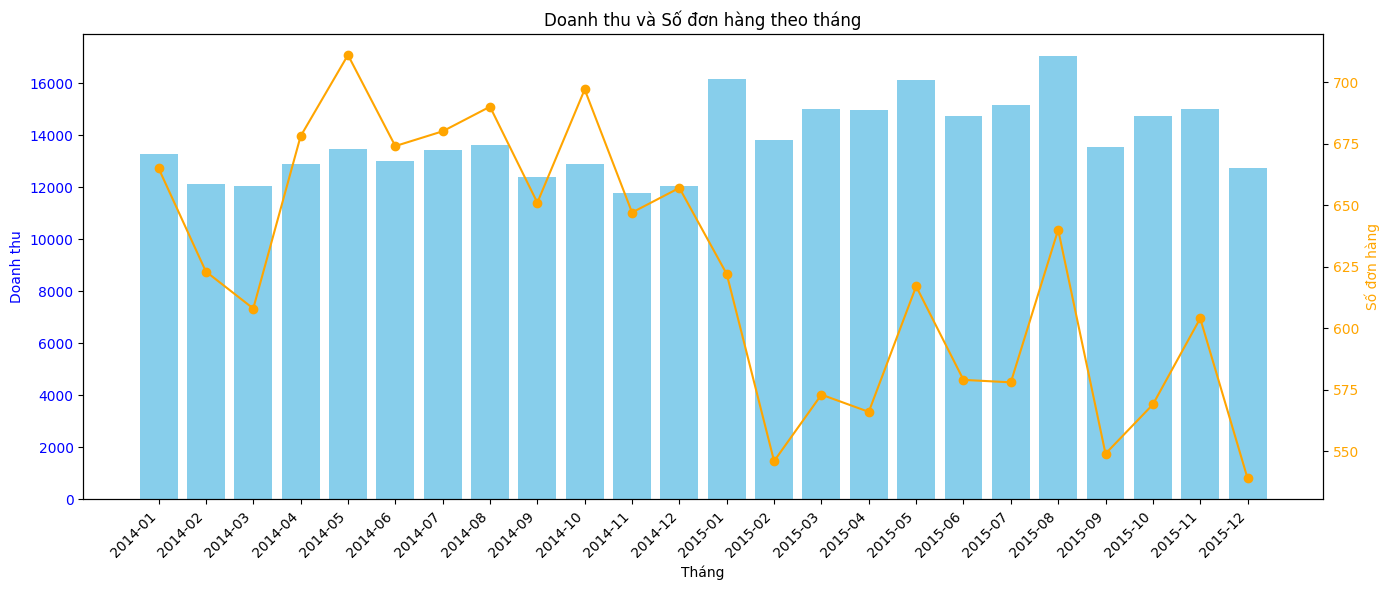

In [ ]:
data['YearMonth'] = data['Date'].dt.to_period('M')

# Tính tổng doanh thu và số đơn hàng duy nhất theo tháng
monthly_data = data.groupby('YearMonth').agg({
    'Gross_sales': 'sum',
    'OrderID': 'nunique'
}).reset_index()

# Chuyển YearMonth thành string để dễ plot
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(14, 6))

# Biểu đồ cột: Doanh thu
ax1.bar(monthly_data['YearMonth'], monthly_data['Gross_sales'], color='skyblue', label='Doanh thu')
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Doanh thu', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Biểu đồ đường: Số đơn hàng
ax2 = ax1.twinx()
ax2.plot(monthly_data['YearMonth'], monthly_data['OrderID'], color='orange', marker='o', label='Số đơn hàng')
ax2.set_ylabel('Số đơn hàng', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Thêm tiêu đề và căn chỉnh
plt.title('Doanh thu và Số đơn hàng theo tháng')
fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()


* năm 2014: số đơn hàng nhiều hơn 2015 nhưng doanh thu thấp hơn, chứng tỏ khách mua giá trị thấp

In [ ]:
# Nhóm theo khách hàng
customer_summary = data.groupby('Member_number').agg(
    num_orders=('OrderID', 'nunique'),
    total_spent=('Gross_sales', 'sum')
).reset_index()

# Tính giá trị trung bình cho mỗi đơn hàng
customer_summary['avg_per_order'] = customer_summary['total_spent'] / customer_summary['num_orders']
customer_summary = customer_summary.sort_values(by=['num_orders', 'total_spent'], ascending=False)

# Hiển thị top 10 khách hàng
print(customer_summary.head(10))



      Member_number  num_orders  total_spent  avg_per_order
1159           2193          11       361.45      32.859091
1234           2271          11       241.80      21.981818
3250           4338          11       239.75      21.795455
2665           3737          11       229.58      20.870909
369            1379          11       217.85      19.804545
772            1793          10       345.10      34.510000
2225           3289          10       334.15      33.415000
2798           3872          10       301.33      30.133000
50             1052          10       271.90      27.190000
2522           3593          10       268.80      26.880000


## RFM

### Create RFM analysis for each customers

In [ ]:
# RFM
# Convert string to date, get max date of dataframe
max_date = data['Date'].max().date()

Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)

data_RFM = data.groupby('Member_number').agg({'Date': Recency,
                                        'OrderID': Frequency,
                                        'Gross_sales': Monetary })

In [ ]:
data_RFM.head()

,Date,OrderID,Gross_sales
Member_number,,,
1000,35,5,53.80
1001,242,5,100.00
1002,122,4,70.30
1003,323,4,60.65
1004,28,8,204.96


In [ ]:
# Rename the columns of DataFrame
data_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
data_RFM = data_RFM.sort_values('Frequency', ascending=False)

In [ ]:
data_RFM.head()

,Recency,Frequency,Monetary
Member_number,,,
2271,40,11,241.80
4338,80,11,239.75
3737,18,11,229.58
1379,170,11,217.85
2193,91,11,361.45


In [ ]:
data_RFM.shape

(3898, 3)

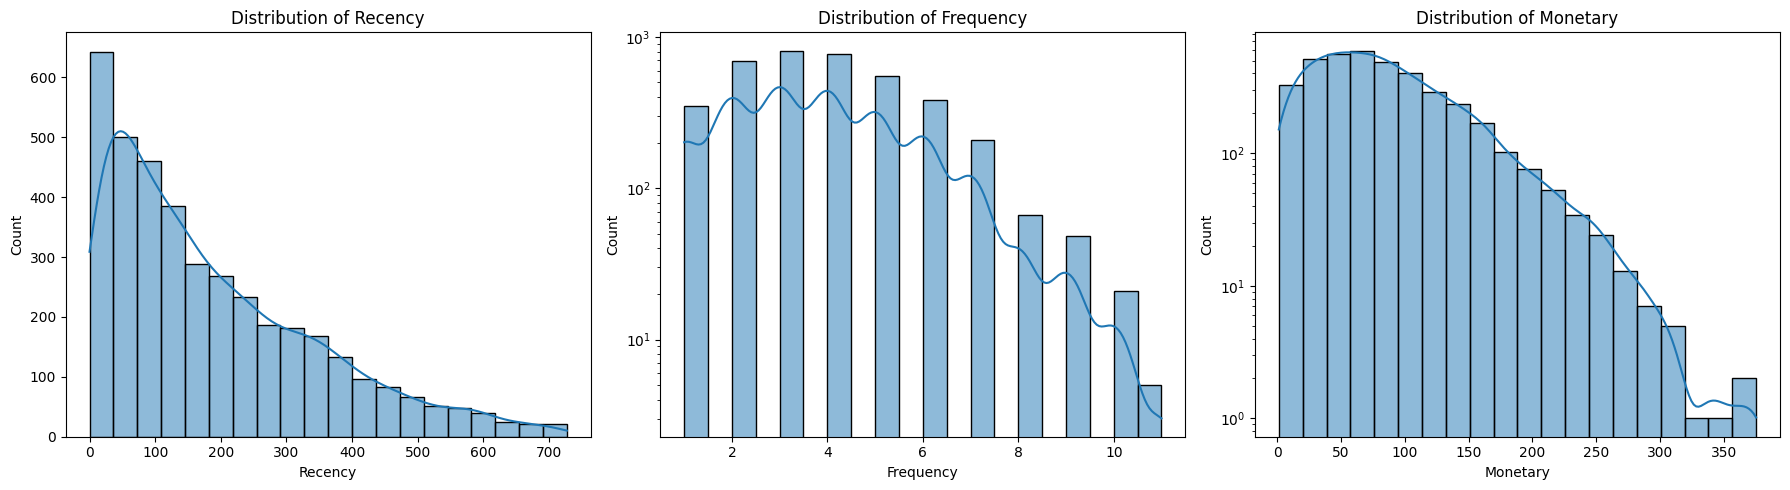

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = ["Recency", "Frequency", "Monetary"]

fig, axes = plt.subplots(1, len(cols), figsize=(18, 5))

for i, c in enumerate(cols):
    sns.histplot(data_RFM[c], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {c}")
    axes[i].set_xlabel(c)

    # Dùng log-scale cho Frequency và Monetary
    if c in ["Frequency", "Monetary"]:
        axes[i].set_yscale("log")

plt.tight_layout()
plt.show()


* data: right-skew

In [ ]:
for c in data_RFM.columns:
  print(c)
  print(data_RFM[c].skew())

Recency
1.0442386313591
Frequency
0.6422259721945635
Monetary
1.0423899887534858


### Calculate RFM quartiles

[RFM ranking – An effective approach to customer segmentation](https://en.wikipedia.org/wiki/RFM_(market_research))

In [ ]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [ ]:
[*r_labels]

[4, 3, 2, 1]

In [ ]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(data_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)
f_groups = pd.qcut(data_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)
m_groups = pd.qcut(data_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [ ]:
# Create new columns R, F, M
data_RFM = data_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
data_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
2271,40,11,241.80,4,4,4
4338,80,11,239.75,3,4,4
3737,18,11,229.58,4,4,4
1379,170,11,217.85,2,4,4
2193,91,11,361.45,3,4,4


#### Calculate RFM score and level

In [ ]:
# Calculate RFM_Score
data_RFM['RFM_Score'] = data_RFM[['R','F','M']].sum(axis=1)
data_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score
Member_number,,,,,,,
2271,40,11,241.80,4,4,4,12
4338,80,11,239.75,3,4,4,11
3737,18,11,229.58,4,4,4,12
1379,170,11,217.85,2,4,4,10
2193,91,11,361.45,3,4,4,11


### Manual Segmentation

In [ ]:
# def rfm_level(df):
#     # Check for special 'STARS' and 'NEW' conditions first
#     if df['RFM_Score'] == 12:
#         return 'CHAMPION'
#     elif df['R'] == 4 and df['F'] == 1:
#         return 'NEW'
#     # Then check for other conditions
#     elif df['M'] == 4:
#         return 'BIG SPENDER'
#     elif df['R'] == 1:
#         return 'LOST'
#     else:
#         return 'LOYAL'

In [ ]:
def rfm_level(df):
    # Check for special 'CHAMPIONS' and 'NEW CUSTOMERS' conditions first
    if df['RFM_Score'] == 12:
        return 'Champions'
    elif df['R'] == 4 :
        return 'New customers'
    # Then check for other condition
    elif df['R'] == 1 and df['M']==1:
        return 'Lost'
    elif df['R'] <=2 and df['M']<=2 and df['F']<=2:
        return 'At risk'
    else:
        return 'Potential customers'

In [ ]:
# Create a new column RFM_Level
data_RFM['RFM_Level'] = data_RFM.apply(rfm_level, axis=1)

In [ ]:
data_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Level
Member_number,,,,,,,,
2271,40,11,241.80,4,4,4,12,Champions
4338,80,11,239.75,3,4,4,11,Potential customers
3737,18,11,229.58,4,4,4,12,Champions
1379,170,11,217.85,2,4,4,10,At risk
2193,91,11,361.45,3,4,4,11,Potential customers


In [ ]:
data_RFM['RFM_Level'].value_counts()

,count
RFM_Level,
Potential customers,1866
New customers,693
At risk,595
Lost,462
Champions,282


#### Calculate mean values for each segment

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = data_RFM.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [ ]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,At risk,206.0,2.0,40.0,391,10.03
1,Champions,29.0,7.0,174.0,282,7.23
2,Lost,420.0,3.0,55.0,975,25.01
3,New customers,28.0,4.0,80.0,693,17.78
4,Potential customers,138.0,4.0,101.0,1557,39.94


#### TreeMap

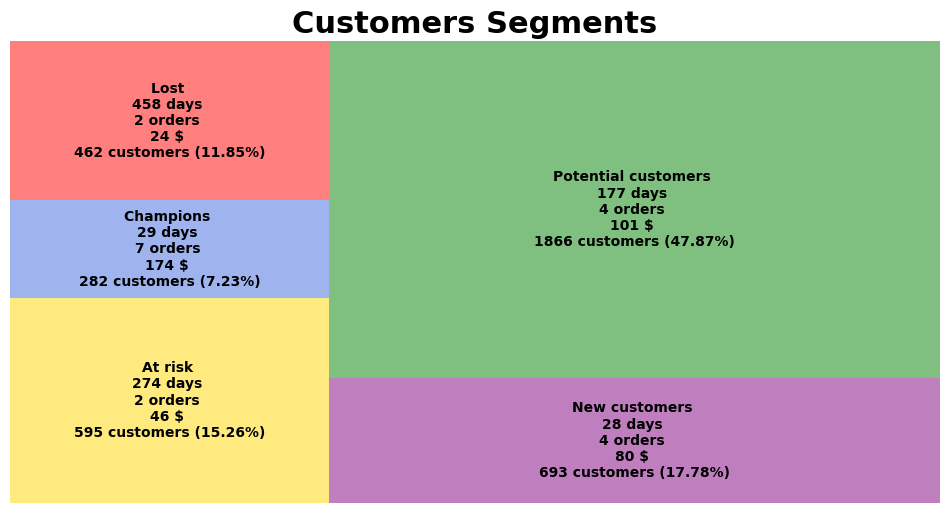

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6)

colors_dict = {'CHAMPION':'gold','BIG SPENDER':'royalblue','LOST':'red', 'LOYAL':'purple', 'NEW':'green'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':10,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments", fontsize=22,fontweight="bold")
plt.axis('off')
plt.show()



```
# Định dạng của đoạn này là mã
```

#### Scatter Plot (RFM)

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max=60)
fig.show()

### Summary:
- Hãy nhận xét chi tiết cho từng nhóm khách hàng!

# MODALING

In [ ]:
data_ = data_RFM[['Recency','Frequency','Monetary']]

In [ ]:
data_.to_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_RFM.csv', index=True)

In [ ]:
data_.shape

(3898, 3)

In [ ]:
data_.head()

,Recency,Frequency,Monetary
Member_number,,,
2271,40,11,241.80
4338,80,11,239.75
3737,18,11,229.58
1379,170,11,217.85
2193,91,11,361.45


In [ ]:
data_.tail()

,Recency,Frequency,Monetary
Member_number,,,
4602,126,1,63.5
4565,0,1,2.2
2002,71,1,47.3
1221,410,1,1.7
2953,360,1,14.6


In [ ]:
data_.describe()

,Recency,Frequency,Monetary
count,3898.000000,3898.000000,3898.000000
mean,187.701385,3.838635,85.212835
std,159.912688,1.883678,55.620089
min,0.000000,1.000000,1.300000
25%,57.000000,2.000000,43.810000
50%,141.000000,4.000000,74.900000
75%,280.000000,5.000000,115.295000
max,727.000000,11.000000,375.310000


Recency skewness: 1.0438367520853933
Recency kurtosis: 0.47615224777950615
----------------------------------------
Frequency skewness: 0.6419788090466868
Frequency kurtosis: 0.23341932558501277
----------------------------------------
Monetary skewness: 1.0419888209370316
Monetary kurtosis: 1.2429118825813488
----------------------------------------
================Sau log-transform=================
Recency skewness: -1.079764854569465
Recency kurtosis: 1.3277451060941647
----------------------------------------
Frequency skewness: -0.2714832919706715
Frequency kurtosis: -0.47083768829298034
----------------------------------------
Monetary skewness: -0.8676329258174709
Monetary kurtosis: 0.9213598601467967
----------------------------------------


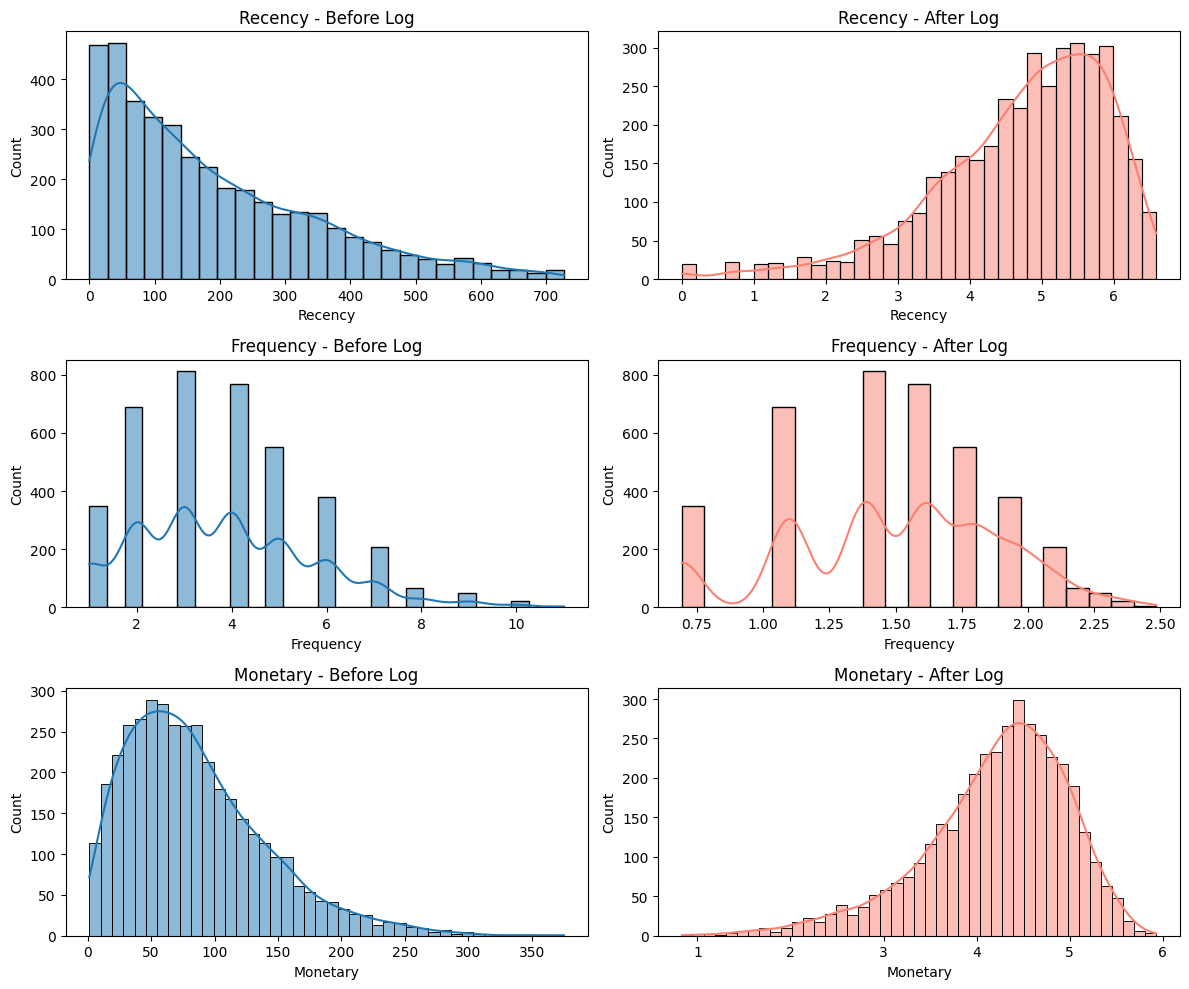

In [ ]:
from scipy.stats import skew, kurtosis
# Tính skewness và kurtosis ban đầu
for col in ["Recency", "Frequency", "Monetary"]:
    print(f"{col} skewness:", skew(data_[col]))
    print(f"{col} kurtosis:", kurtosis(data_[col]))
    print("-"*40)

# Áp dụng log-transform để giảm skewness
df_log = data_[["Recency","Frequency","Monetary"]].apply(lambda x: np.log1p(x)) # log1p = log(x+1)

# Tính skewness và kurtosis sau log-transform
print("Sau log-transform".center(50,"="))
for col in ["Recency", "Frequency", "Monetary"]:
    print(f"{col} skewness:", skew(df_log[col]))
    print(f"{col} kurtosis:", kurtosis(df_log[col]))
    print("-"*40)

# Vẽ biểu đồ so sánh trước/sau
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i, col in enumerate(["Recency", "Frequency", "Monetary"]):
    sns.histplot(data_RFM[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"{col} - Before Log")

    sns.histplot(df_log[col], kde=True, ax=axes[i,1], color="salmon")
    axes[i,1].set_title(f"{col} - After Log")

plt.tight_layout()
plt.show()

In [ ]:
df_log.shape

(3898, 3)

In [ ]:
df_log.head()

,Recency,Frequency,Monetary
Member_number,,,
2271,3.713572,2.484907,5.492238
4338,4.394449,2.484907,5.483759
3737,2.944439,2.484907,5.440598
1379,5.141664,2.484907,5.388387
2193,4.521789,2.484907,5.892887


In [ ]:
from sklearn.preprocessing import RobustScaler


In [ ]:
#scaler data bằng RobustScaler do có outliers
scaler = RobustScaler()
data_final = scaler.fit_transform(df_log)

In [ ]:
data_final.shape

(3898, 3)

In [ ]:
data_final = pd.DataFrame(data_final, columns=['Recency', 'Frequency', 'Monetary'])

In [ ]:
data_final.head()

,Recency,Frequency,Monetary
0,-0.787278,1.263034,1.219275
1,-0.355773,1.263034,1.210385
2,-1.274715,1.263034,1.165128
3,0.117774,1.263034,1.110382
4,-0.275071,1.263034,1.639375


In [ ]:
# lưu file để sử dung pyspark
data_final.to_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_scaled.csv', index=False)

# K-MEANS

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_final)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

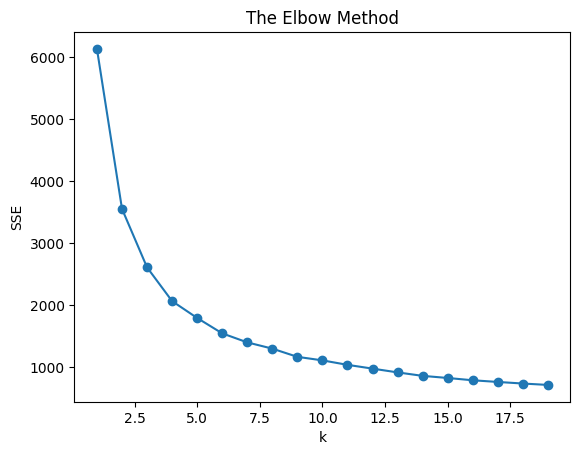

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.show()

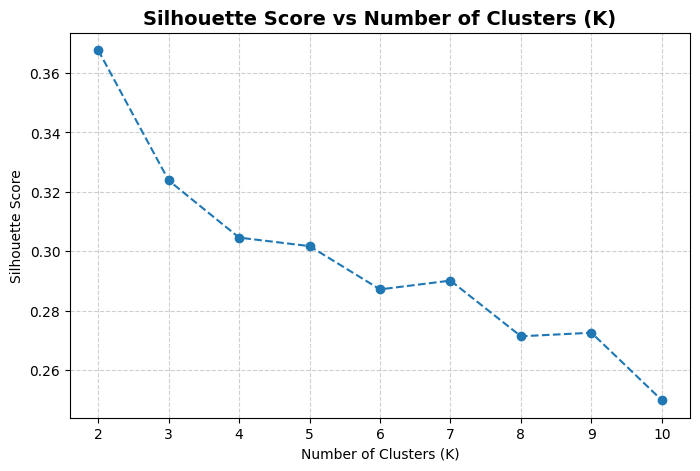

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)  # thử từ 2 đến 10 cụm

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_final)   # data_final = log + RobustScaler
    sil = silhouette_score(data_final, labels)
    sil_scores.append(sil)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Score vs Number of Clusters (K)", fontsize=14, fontweight="bold")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Build model with k=5
model = KMeans(n_clusters=5, random_state=42)
model.fit(data_final)

KMeans(n_clusters=5, random_state=42)

In [ ]:
import pickle

In [ ]:
with open("/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/kmeans_rfm_model.pkl", "wb") as f:
    pickle.dump((scaler, model), f)
print("Model đã được lưu bằng pickle!")

Model đã được lưu bằng pickle!


In [ ]:
#gán cluster cho từng khách hàng
data_["Cluster"] = model.labels_
data_.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

/tmp/ipython-input-2190822691.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         20.34      3.91    78.46   533
1        275.99      2.44    45.19   997
2        206.88      4.19    95.81  1223
3        368.41      1.34    14.17   372
4         71.92      6.25   158.91   773

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = data_.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster '+ rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,20.0,4.0,78.0,533,13.67
1,Cluster 1,276.0,2.0,45.0,997,25.58
2,Cluster 2,207.0,4.0,96.0,1223,31.38
3,Cluster 3,368.0,1.0,14.0,372,9.54
4,Cluster 4,72.0,6.0,159.0,773,19.83


In [ ]:
cluster_labels = {
    'Cluster 0': 'New customers',
    'Cluster 1': 'At risk',
    'Cluster 2': 'Potential customers',
    'Cluster 3': 'Lost',
    'Cluster 4': 'Champions'
}

# Apply mapping to the DataFrame
rfm_agg2['Segment'] = rfm_agg2['Cluster'].map(cluster_labels)

rfm_agg2.head()


,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent,Segment
0,Cluster 0,20.0,4.0,78.0,533,13.67,New customers
1,Cluster 1,276.0,2.0,45.0,997,25.58,At risk
2,Cluster 2,207.0,4.0,96.0,1223,31.38,Potential customers
3,Cluster 3,368.0,1.0,14.0,372,9.54,Lost
4,Cluster 4,72.0,6.0,159.0,773,19.83,Champions


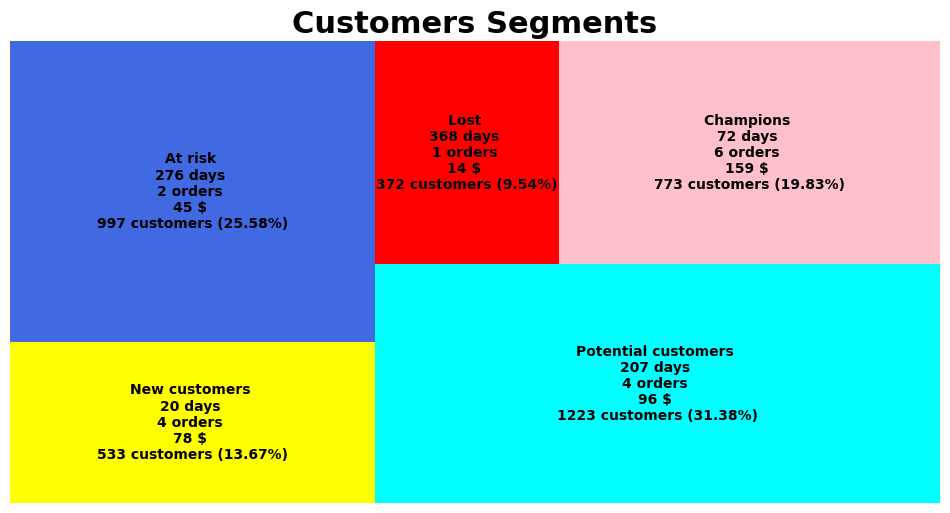

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 6)

colors_dict2 = {'New customers':'yellow','At risk':'royalblue', 'Potential customers':'cyan',
               'Lost':'red', 'Champions':'pink'}
labels = [
    '{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({:.2f}%)'.format(
        rfm_agg2.iloc[i]['Segment'],
        rfm_agg2.iloc[i]['RecencyMean'],
        rfm_agg2.iloc[i]['FrequencyMean'],
        rfm_agg2.iloc[i]['MonetaryMean'],
        rfm_agg2.iloc[i]['Count'],
        rfm_agg2.iloc[i]['Percent']
    )
    for i in range(len(rfm_agg2))
]

squarify.plot(sizes=rfm_agg2['Count'],
              text_kwargs={'fontsize':10,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict2.values(),
              label=labels)


plt.title("Customers Segments",fontsize=22,fontweight="bold")
plt.axis('off')

#plt.savefig('/content/gdrive/MyDrive/LDS0/Khoa_306/Project _1_Segmentation/demo/Unsupervised Segments.png')
plt.show()

* Potential customers chiếm tỷ lệ cao nhất 31.38%, mức chi tiêu vừa
* Champions chiếm tỷ lệ khá cao, mức chi tiêu cao, đóng góp 31,53% doanh thu của cửa hàng
* Khách hàng mới với mức chi tiêu vừa, đóng góp 10,66% doanh thu
* Khách hàng có nguy cơ rời bỏ cưa hàng chiếm tỷ lệ cao, 25,58%, chủ cửa hàng nên có chiến lược phù hợp để kéo nhóm khách này quay trở lại mua sắm thường xuyên hơn
* Khách hàng rời bỏ dưới 10%, mức chấp nhận được, chi tiêu ít, không cần đặt nhiều chi phí cho nhóm khách này
### Như vậy chủ cửa hàng nên tập trung chăm sóc cho nhóm khách hàng Potential, New và Champions, đưa ra nhưng ưu đãi phù hợp cho từng nhóm khách hàng để duy trì, tăng cường tần suất cũng như mức chi tiêu

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Segment",
           hover_name="Segment", size_max=60)
fig.show()

In [ ]:
cluster_labels = {
    0: 'New customers',
    1: 'At risk',
    2: 'Potential customers',
    3: 'Lost',
    4: 'Champions'
}

# Apply mapping to the DataFrame
data_['Segment'] = data_['Cluster'].map(cluster_labels)
data_ = data_.reset_index()
data_.head()

/tmp/ipython-input-4176610364.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Member_number,Recency,Frequency,Monetary,Cluster,Segment
0,2271,40,11,241.80,4,Champions
1,4338,80,11,239.75,4,Champions
2,3737,18,11,229.58,4,Champions
3,1379,170,11,217.85,4,Champions
4,2193,91,11,361.45,4,Champions


In [ ]:
df_seg = data.merge(data_[['Member_number','Segment']], on='Member_number', how='left')
df_seg.head()

,Member_number,Date,productId,items,productName,price,Category,Gross_sales,OrderID,YearMonth,Segment
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,2988,2015-07,Potential customers
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,5784,2015-01,Potential customers
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,4852,2015-09,Potential customers
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4,688,2015-12,New customers
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8,7585,2015-02,Lost


In [ ]:
segments_keep = ['Champions', 'Potential customers', 'New customers']

df_filtered = df_seg[df_seg['Segment'].isin(segments_keep)]

In [ ]:
top_products_qty = (
    df_filtered.groupby(['Segment','productName'])['items']
          .sum()
          .reset_index()
          .sort_values(['Segment','items'], ascending=[True, False])
          .groupby('Segment')
          .head(5)
)



In [ ]:
print("=== Top sản phẩm theo số lượng ===")
top_products_qty

=== Top sản phẩm theo số lượng ===


,Segment,productName,items
158,Champions,whole milk,1700
98,Champions,other vegetables,1182
117,Champions,rolls/buns,986
133,Champions,soda,913
159,Champions,yogurt,846
316,New customers,whole milk,726
258,New customers,other vegetables,573
276,New customers,rolls/buns,510
317,New customers,yogurt,396
291,New customers,soda,386


## RFM + GMM

In [ ]:
data_gmm = pd.read_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_scaled.csv')
data_gmm.head()

,Recency,Frequency,Monetary
0,-0.787278,1.263034,1.219275
1,-0.355773,1.263034,1.210385
2,-1.274715,1.263034,1.165128
3,0.117774,1.263034,1.110382
4,-0.275071,1.263034,1.639375


In [ ]:
data_customers = pd.read_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_RFM.csv')
data_customers= data_customers.set_index('Member_number')
data_customers.head()

,Recency,Frequency,Monetary
Member_number,,,
2271,40,11,241.80
4338,80,11,239.75
3737,18,11,229.58
1379,170,11,217.85
2193,91,11,361.45


In [ ]:
from sklearn.mixture import GaussianMixture

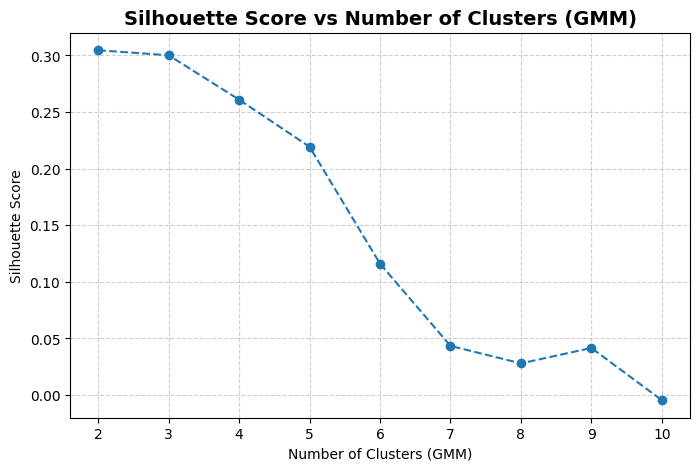

In [ ]:
sil_scores1 = []
GMM_range = range(2, 11)  # thử từ 2 đến 10 cụm

for g in GMM_range:
    gmm = GaussianMixture(n_components=g, random_state=42)
    labels = gmm.fit_predict(data_gmm)   # data_final = log + RobustScaler
    sil = silhouette_score(data_gmm, labels)
    sil_scores1.append(sil)

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.plot(GMM_range, sil_scores1, marker='o', linestyle='--')
plt.title("Silhouette Score vs Number of Clusters (GMM)", fontsize=14, fontweight="bold")
plt.xlabel("Number of Clusters (GMM)")
plt.ylabel("Silhouette Score")
plt.xticks(GMM_range)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
# 4 componants:
model1= GaussianMixture(n_components=4, random_state=42)
model1.fit(data_gmm)

GaussianMixture(n_components=4, random_state=42)

In [ ]:
gmm_labels = model1.predict(data_gmm)
data_customers['GMM_Cluster'] = gmm_labels

In [ ]:
print(data_customers['GMM_Cluster'].value_counts())

GMM_Cluster
1    1494
2    1437
0     551
3     416
Name: count, dtype: int64


In [ ]:
data_customers.head()

,Recency,Frequency,Monetary,GMM_Cluster
Member_number,,,,
2271,40,11,241.80,2
4338,80,11,239.75,2
3737,18,11,229.58,2
1379,170,11,217.85,2
2193,91,11,361.45,2


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg3 = data_customers.groupby('GMM_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg3.columns = rfm_agg3.columns.droplevel()
rfm_agg3.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg3['Percent'] = round((rfm_agg3['Count']/rfm_agg3.Count.sum())*100, 2)

# Reset the index
rfm_agg3 = rfm_agg3.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg3['GMM_Cluster'] = 'Cluster '+ rfm_agg3['GMM_Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg3

,GMM_Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,32.0,4.0,72.0,551,14.14
1,Cluster 1,251.0,3.0,66.0,1494,38.33
2,Cluster 2,103.0,5.0,128.0,1437,36.87
3,Cluster 3,460.0,1.0,25.0,416,10.67


In [ ]:
cluster_labels = {
    'Cluster 0': 'New customers',
    'Cluster 1': 'At risk',
    'Cluster 2': 'Potential customers',
    'Cluster 3': 'Lost',
}

# Apply mapping to the DataFrame
rfm_agg3['Segment'] = rfm_agg3['GMM_Cluster'].map(cluster_labels)

rfm_agg3.head()

,GMM_Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent,Segment
0,Cluster 0,32.0,4.0,72.0,551,14.14,New customers
1,Cluster 1,251.0,3.0,66.0,1494,38.33,At risk
2,Cluster 2,103.0,5.0,128.0,1437,36.87,Potential customers
3,Cluster 3,460.0,1.0,25.0,416,10.67,Lost


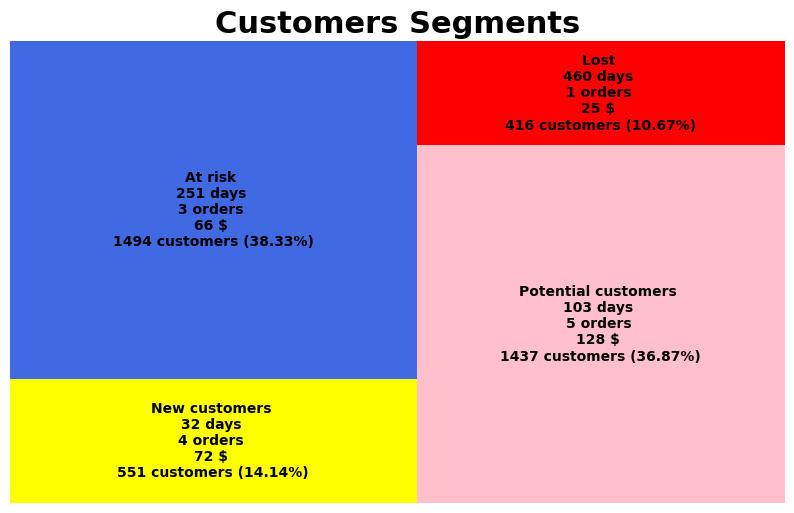

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 6)

colors_dict3 = {'New customers':'yellow','At risk':'royalblue', 'Potential customers':'Pink',
               'Lost':'red'}
labels = [
    '{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({:.2f}%)'.format(
        rfm_agg3.iloc[i]['Segment'],
        rfm_agg3.iloc[i]['RecencyMean'],
        rfm_agg3.iloc[i]['FrequencyMean'],
        rfm_agg3.iloc[i]['MonetaryMean'],
        rfm_agg3.iloc[i]['Count'],
        rfm_agg3.iloc[i]['Percent']
    )
    for i in range(len(rfm_agg3))
]

squarify.plot(sizes=rfm_agg3['Count'],
              text_kwargs={'fontsize':10,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict3.values(),
              label=labels)


plt.title("Customers Segments",fontsize=22,fontweight="bold")
plt.axis('off')

#plt.savefig('/content/gdrive/MyDrive/LDS0/Khoa_306/Project _1_Segmentation/demo/Unsupervised Segments.png')
plt.show()

* Nhóm Potential chiếm tỷ lệ cao (36.87%) với mức chi tiêu cao, đóng góp 47,19% doanh thu , cửa hàng nên ưu tiên chăm sóc nhóm khách này
* Khách hàng mới chiếm tỷ lệ vừa, mức chi tiêu trung bình
* Nhóm khách có nguy cơ rời bỏ chiếm tỷ lệ cao nhất, chiêu vừa, chủ cửa hàng nên chú ý vào nhóm khách này với chiến lược phù để kéo khách quay lại thường xuyên hơn, chi tiêu cao hơn
* Nhóm khách rời bỏ cửa hàng với mức chấp nhận được

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg3, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Segment",
           hover_name="Segment", size_max=60)
fig.show()

## RFM + Hierarchical Clustering

In [ ]:
data_hc = pd.read_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_scaled.csv')
data_hc.head()

,Recency,Frequency,Monetary
0,-0.787278,1.263034,1.219275
1,-0.355773,1.263034,1.210385
2,-1.274715,1.263034,1.165128
3,0.117774,1.263034,1.110382
4,-0.275071,1.263034,1.639375


In [ ]:
data_customers_hc = pd.read_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_RFM.csv')
data_customers_hc = data_customers_hc.set_index('Member_number')
data_customers_hc.head()

,Recency,Frequency,Monetary
Member_number,,,
2271,40,11,241.80
4338,80,11,239.75
3737,18,11,229.58
1379,170,11,217.85
2193,91,11,361.45


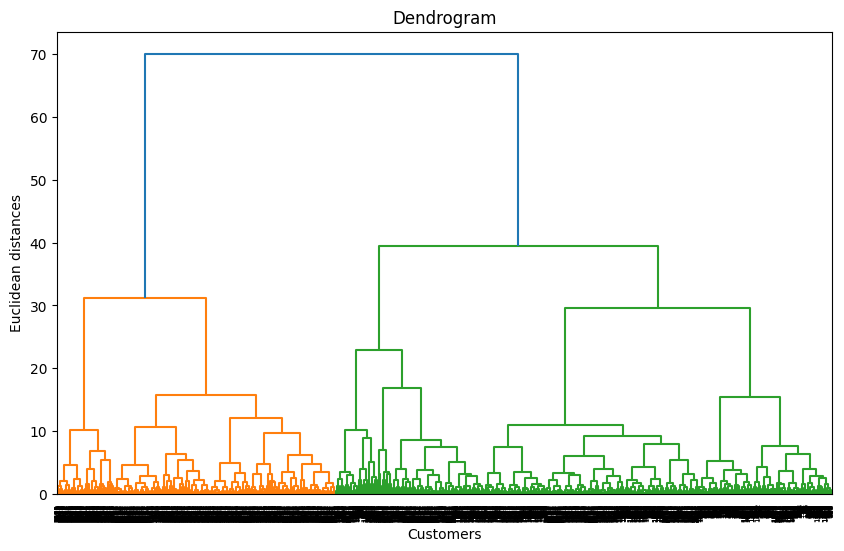

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(data_hc, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

Số cụm = 2, Silhouette Score = 0.3565
Số cụm = 3, Silhouette Score = 0.3060
Số cụm = 4, Silhouette Score = 0.2759
Số cụm = 5, Silhouette Score = 0.2501
Số cụm = 6, Silhouette Score = 0.2593
Số cụm = 7, Silhouette Score = 0.2559
Số cụm = 8, Silhouette Score = 0.2280
Số cụm = 9, Silhouette Score = 0.2072


/tmp/ipython-input-4220520445.py:17: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



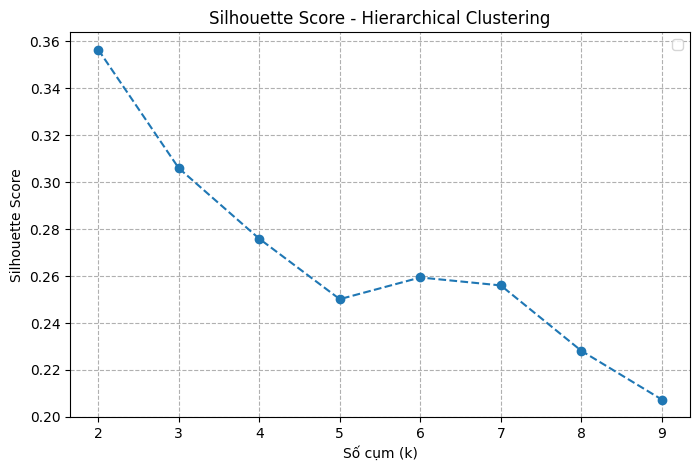

In [ ]:
scores_hc = []
K = range(2, 10)  # thử từ 2 đến 9 cụm

for k in K:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_hc = hc.fit_predict(data_hc)
    score = silhouette_score(data_hc, labels_hc)
    scores_hc.append(score)
    print(f"Số cụm = {k}, Silhouette Score = {score:.4f}")

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
plt.plot(K, scores_hc, marker='o', linestyle='--')
plt.title("Silhouette Score - Hierarchical Clustering")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True,linestyle='--')
plt.show()

In [ ]:
#k=4
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(data_hc)

In [ ]:
data_customers_hc['HC_Cluster'] =hc_labels

In [ ]:
rfm_agg4 = data_customers_hc.groupby('HC_Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg4.columns = rfm_agg4.columns.droplevel()
rfm_agg4.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg4['Percent'] = round((rfm_agg4['Count']/rfm_agg4.Count.sum())*100, 2)

# Reset the index
rfm_agg4 = rfm_agg4.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg4['HC_Cluster'] = 'Cluster '+ rfm_agg4['HC_Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg4

,HC_Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,155.0,5.0,125.0,1748,44.84
1,Cluster 1,284.0,2.0,46.0,1119,28.71
2,Cluster 2,35.0,4.0,79.0,745,19.11
3,Cluster 3,410.0,1.0,14.0,286,7.34


In [ ]:
cluster_labels = {
    'Cluster 0': 'Potential customers',
    'Cluster 1': 'At risk',
    'Cluster 2': 'New customers',
    'Cluster 3': 'Lost',
}

# Apply mapping to the DataFrame
rfm_agg4['Segment'] = rfm_agg4['HC_Cluster'].map(cluster_labels)

rfm_agg4.head()

,HC_Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent,Segment
0,Cluster 0,155.0,5.0,125.0,1748,44.84,Potential customers
1,Cluster 1,284.0,2.0,46.0,1119,28.71,At risk
2,Cluster 2,35.0,4.0,79.0,745,19.11,New customers
3,Cluster 3,410.0,1.0,14.0,286,7.34,Lost


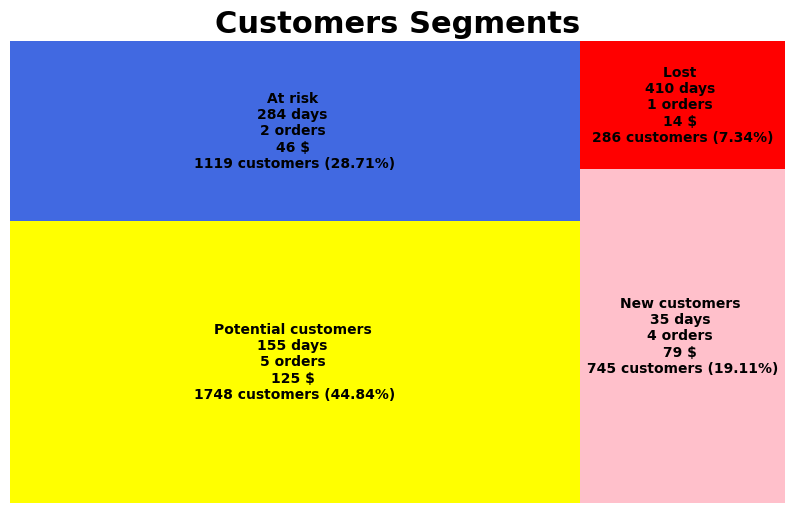

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 6)

colors_dict4 = {'Champions':'yellow','At risk':'royalblue', 'Loyal':'Pink',
               'Lost':'red'}
labels = [
    '{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({:.2f}%)'.format(
        rfm_agg4.iloc[i]['Segment'],
        rfm_agg4.iloc[i]['RecencyMean'],
        rfm_agg4.iloc[i]['FrequencyMean'],
        rfm_agg4.iloc[i]['MonetaryMean'],
        rfm_agg4.iloc[i]['Count'],
        rfm_agg4.iloc[i]['Percent']
    )
    for i in range(len(rfm_agg4))
]

squarify.plot(sizes=rfm_agg4['Count'],
              text_kwargs={'fontsize':10,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict4.values(),
              label=labels)


plt.title("Customers Segments",fontsize=22,fontweight="bold")
plt.axis('off')

#plt.savefig('/content/gdrive/MyDrive/LDS0/Khoa_306/Project _1_Segmentation/demo/Unsupervised Segments.png')
plt.show()

* Nhóm Potential chiếm tỷ lệ cao nhất (44.84%) với mức chi tiêu cao, đóng góp 56.05% doanh thu , cửa hàng nên ưu tiên chăm sóc nhóm khách này
* Khách hàng mới chiếm tỷ lệ vừa, mức chi tiêu khá, cửa hàng nên có chiến lược phù hợp để đẩy nhóm khách này lên Potential
* Nhóm khách có nguy cơ rời bỏ chiếm tỷ lệ vừa, chi tiêu trung bình
* Nhóm khách rời bỏ cửa hàng dưới 10% với mức chấp nhận được

In [ ]:
import plotly.express as px

fig = px.scatter(rfm_agg4, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Segment",
           hover_name="Segment", size_max=60)
fig.show()

#### Summary
- nhóm nên nhóm e đề xuất chủ cửa hàng chia cụm khách hàng theo model K-means vì K-means phân chia cụm khách hàng khá phù hợp và dễ dàng trong việc chăm sóc từng

In [ ]:
date = '16/04/2025'
fre = 4
mone = 50


In [ ]:
max_day = '2024/03/04'

In [ ]:
max_date = pd.to_datetime(date)
today = pd.to_datetime("today")
recency = (today - max_date).days

# Tạo DataFrame RFM cho 1 khách hàng
data_ = pd.DataFrame([{
    "Recency": recency,
    "Frequency": fre,
    "Monetary": mone
}])

# Chuẩn hóa & dự đoán cluster
df_ = data_[["Recency","Frequency","Monetary"]].apply(lambda x: np.log1p(x))
_final = scaler.transform(df_)
pred = model.predict(_final)
data_["Cluster"] = pred
data_

# Gắn nhãn phân khúc
#data_["Segment"] = data_["Cluster"].map(assign_segment)

/tmp/ipython-input-3873627556.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,Recency,Frequency,Monetary,Cluster
0,157,4,50,2


In [ ]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    1 non-null      int64
 1   Frequency  1 non-null      int64
 2   Monetary   1 non-null      int64
 3   Cluster    1 non-null      int32
dtypes: int32(1), int64(3)
memory usage: 160.0 bytes


In [ ]:
df = pd.DataFrame({
    "CustomerID": [1, 2, 3],
    "Date": ["2025-06-01", "2025-08-10", "2025-09-12" ],
    "Frequency": [5, 3, 7],
    "Monetary": [200, 120, 340]})

In [ ]:
df.to_csv('/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/data_predict.csv', index=False)